In [45]:
import numpy as np
import pandas as pd

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import lightgbm as lgb
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from catboost import Pool, CatBoostClassifier

In [47]:
data = pd.read_csv('../input/keiba_data.csv')

In [48]:
data.head()

harai  rank  rank_1  rank_2  rank_3  rank_4  rank_5  rank_6  rank_7  \
0   7070    22     145     148     185     205     222     252     258   
1   1600     4     105     115     120     160     191     198     244   
2   4160    11      97     127     131     139     142     215     239   
3   3050     9     117     120     121     143     211     286     295   
4  11910    37      97     131     142     188     216     224     237   

   rank_8    ...     rank_291  rank_292  rank_293  rank_294  rank_295  \
0     259    ...      36854.0   36854.0   37402.0   37588.0   38547.0   
1     274    ...      46651.0   46964.0   46964.0   46964.0   47603.0   
2     364    ...          NaN       NaN       NaN       NaN       NaN   
3     300    ...          NaN       NaN       NaN       NaN       NaN   
4     327    ...      55168.0   55491.0   56482.0   56820.0   57163.0   

   rank_296  rank_297  rank_298  rank_299  rank_300  
0   38744.0   38744.0   39146.0   41285.0   41512.0  
1   47603.0   48594.0   48594.0   48934.0   49628.0  
2       NaN       NaN       NaN       NaN       NaN  
3       NaN       NaN       NaN       NaN       NaN  
4   57509.0   58938.0   58938.0   60057.0   60057.0  

[5 rows x 302 columns]

In [49]:
data['manba_flag'] = data['harai'].apply(lambda x : 1 if x >= 10000 else 0)

In [50]:
data.head()

harai  rank  rank_1  rank_2  rank_3  rank_4  rank_5  rank_6  rank_7  \
0   7070    22     145     148     185     205     222     252     258   
1   1600     4     105     115     120     160     191     198     244   
2   4160    11      97     127     131     139     142     215     239   
3   3050     9     117     120     121     143     211     286     295   
4  11910    37      97     131     142     188     216     224     237   

   rank_8     ...      rank_292  rank_293  rank_294  rank_295  rank_296  \
0     259     ...       36854.0   37402.0   37588.0   38547.0   38744.0   
1     274     ...       46964.0   46964.0   46964.0   47603.0   47603.0   
2     364     ...           NaN       NaN       NaN       NaN       NaN   
3     300     ...           NaN       NaN       NaN       NaN       NaN   
4     327     ...       55491.0   56482.0   56820.0   57163.0   57509.0   

   rank_297  rank_298  rank_299  rank_300  manba_flag  
0   38744.0   39146.0   41285.0   41512.0           0  
1   48594.0   48594.0   48934.0   49628.0           0  
2       NaN       NaN       NaN       NaN           0  
3       NaN       NaN       NaN       NaN           0  
4   58938.0   58938.0   60057.0   60057.0           1  

[5 rows x 303 columns]

In [51]:
#data.to_csv('/Users/k17099kk/bigdata/keiba/keiba_data_to_manba.csv')

In [52]:
X = data.drop(['harai', 'rank', 'manba_flag'],axis=1)
y = data['manba_flag']

In [53]:
X.head()

rank_1  rank_2  rank_3  rank_4  rank_5  rank_6  rank_7  rank_8  rank_9  \
0     145     148     185     205     222     252     258     259     262   
1     105     115     120     160     191     198     244     274     287   
2      97     127     131     139     142     215     239     364     368   
3     117     120     121     143     211     286     295     300     305   
4      97     131     142     188     216     224     237     327     330   

   rank_10    ...     rank_291  rank_292  rank_293  rank_294  rank_295  \
0      319    ...      36854.0   36854.0   37402.0   37588.0   38547.0   
1      292    ...      46651.0   46964.0   46964.0   46964.0   47603.0   
2      411    ...          NaN       NaN       NaN       NaN       NaN   
3      305    ...          NaN       NaN       NaN       NaN       NaN   
4      336    ...      55168.0   55491.0   56482.0   56820.0   57163.0   

   rank_296  rank_297  rank_298  rank_299  rank_300  
0   38744.0   38744.0   39146.0   41285.0   41512.0  
1   47603.0   48594.0   48594.0   48934.0   49628.0  
2       NaN       NaN       NaN       NaN       NaN  
3       NaN       NaN       NaN       NaN       NaN  
4   57509.0   58938.0   58938.0   60057.0   60057.0  

[5 rows x 300 columns]

In [54]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: manba_flag, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,)

In [56]:
train = pd.concat([y_train, X_train], axis=1)

In [57]:
test = pd.concat([y_test, X_test], axis=1)

# targetの割合

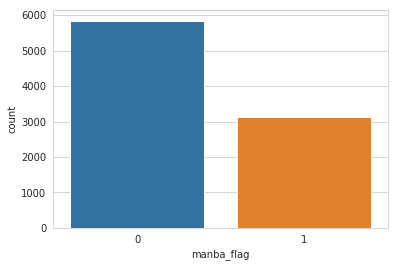

In [58]:
sns.countplot(y_train)

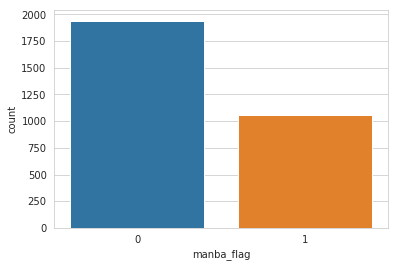

In [59]:
sns.countplot(y_test)

In [60]:
#X_train.to_csv('/Users/k17099kk/bigdata/keiba/keiba_data_to_manba.csv')

# targetに対しての相関係数

In [61]:
train_corr_matrix = train.corr().abs()
train_manba_corr = train_corr_matrix['manba_flag']
test_corr_matrix = test.corr().abs()
test_manba_corr = test_corr_matrix['manba_flag']

In [62]:
train_manba_corr[:50]

manba_flag    1.000000
rank_1        0.273444
rank_2        0.283066
rank_3        0.288062
rank_4        0.293387
rank_5        0.297163
rank_6        0.291542
rank_7        0.287804
rank_8        0.288427
rank_9        0.279913
rank_10       0.276692
rank_11       0.269279
rank_12       0.254483
rank_13       0.241599
rank_14       0.232483
rank_15       0.215933
rank_16       0.204882
rank_17       0.186616
rank_18       0.166811
rank_19       0.147138
rank_20       0.125812
rank_21       0.114677
rank_22       0.091043
rank_23       0.067831
rank_24       0.043514
rank_25       0.023153
rank_26       0.000665
rank_27       0.017599
rank_28       0.030175
rank_29       0.048940
rank_30       0.062094
rank_31       0.076654
rank_32       0.087054
rank_33       0.098829
rank_34       0.107811
rank_35       0.117379
rank_36       0.124042
rank_37       0.135846
rank_38       0.141514
rank_39       0.149107
rank_40       0.155462
rank_41       0.160119
rank_42       0.164667
rank_43    

In [63]:
train_manba_corr[50:100]

rank_50    0.179670
rank_51    0.182285
rank_52    0.184136
rank_53    0.184250
rank_54    0.181392
rank_55    0.181438
rank_56    0.179476
rank_57    0.207244
rank_58    0.208183
rank_59    0.208839
rank_60    0.209787
rank_61    0.210073
rank_62    0.212195
rank_63    0.212765
rank_64    0.213694
rank_65    0.212901
rank_66    0.213397
rank_67    0.212814
rank_68    0.211731
rank_69    0.212021
rank_70    0.209840
rank_71    0.208966
rank_72    0.208820
rank_73    0.207710
rank_74    0.206847
rank_75    0.205428
rank_76    0.203767
rank_77    0.202528
rank_78    0.202563
rank_79    0.201272
rank_80    0.200229
rank_81    0.198483
rank_82    0.195191
rank_83    0.192414
rank_84    0.187618
rank_85    0.228161
rank_86    0.228516
rank_87    0.228201
rank_88    0.227832
rank_89    0.227838
rank_90    0.227355
rank_91    0.227654
rank_92    0.226062
rank_93    0.226209
rank_94    0.226809
rank_95    0.225668
rank_96    0.225770
rank_97    0.226069
rank_98    0.225268
rank_99    0.224655


In [64]:
train_manba_corr[100:150]

rank_100    0.224047
rank_101    0.223200
rank_102    0.221843
rank_103    0.221680
rank_104    0.221255
rank_105    0.219873
rank_106    0.219845
rank_107    0.218355
rank_108    0.216941
rank_109    0.214996
rank_110    0.213376
rank_111    0.211703
rank_112    0.210228
rank_113    0.208571
rank_114    0.207281
rank_115    0.204320
rank_116    0.202517
rank_117    0.200370
rank_118    0.197666
rank_119    0.191490
rank_120    0.183123
rank_121    0.230040
rank_122    0.229929
rank_123    0.229707
rank_124    0.229475
rank_125    0.228926
rank_126    0.228376
rank_127    0.228163
rank_128    0.228227
rank_129    0.227623
rank_130    0.226713
rank_131    0.226661
rank_132    0.226003
rank_133    0.225668
rank_134    0.225030
rank_135    0.224298
rank_136    0.224121
rank_137    0.223498
rank_138    0.223095
rank_139    0.222263
rank_140    0.221772
rank_141    0.221331
rank_142    0.220793
rank_143    0.220285
rank_144    0.219446
rank_145    0.218304
rank_146    0.217386
rank_147    0

In [65]:
train_manba_corr[150:200]

rank_150    0.212335
rank_151    0.211020
rank_152    0.209970
rank_153    0.209029
rank_154    0.207640
rank_155    0.205913
rank_156    0.204364
rank_157    0.202693
rank_158    0.199618
rank_159    0.197511
rank_160    0.194503
rank_161    0.191651
rank_162    0.187910
rank_163    0.183744
rank_164    0.179350
rank_165    0.170022
rank_166    0.222959
rank_167    0.222897
rank_168    0.222641
rank_169    0.221709
rank_170    0.221253
rank_171    0.221173
rank_172    0.221042
rank_173    0.220654
rank_174    0.220116
rank_175    0.219589
rank_176    0.218698
rank_177    0.218016
rank_178    0.216863
rank_179    0.216126
rank_180    0.215311
rank_181    0.214998
rank_182    0.213934
rank_183    0.213820
rank_184    0.212935
rank_185    0.212764
rank_186    0.212183
rank_187    0.211601
rank_188    0.211146
rank_189    0.210228
rank_190    0.209730
rank_191    0.209288
rank_192    0.208888
rank_193    0.208163
rank_194    0.207080
rank_195    0.205618
rank_196    0.204515
rank_197    0

In [66]:
train_manba_corr[200:250]

rank_200    0.201721
rank_201    0.200676
rank_202    0.199930
rank_203    0.199350
rank_204    0.197993
rank_205    0.197264
rank_206    0.194816
rank_207    0.193394
rank_208    0.191293
rank_209    0.189439
rank_210    0.188067
rank_211    0.186144
rank_212    0.184402
rank_213    0.183078
rank_214    0.181553
rank_215    0.178205
rank_216    0.175267
rank_217    0.171536
rank_218    0.166910
rank_219    0.156299
rank_220    0.147409
rank_221    0.225250
rank_222    0.225034
rank_223    0.225069
rank_224    0.224717
rank_225    0.224268
rank_226    0.223883
rank_227    0.222741
rank_228    0.222762
rank_229    0.222113
rank_230    0.222163
rank_231    0.221146
rank_232    0.220998
rank_233    0.220579
rank_234    0.220283
rank_235    0.219494
rank_236    0.218598
rank_237    0.218674
rank_238    0.218131
rank_239    0.217514
rank_240    0.216830
rank_241    0.216176
rank_242    0.215857
rank_243    0.214984
rank_244    0.213828
rank_245    0.213605
rank_246    0.212321
rank_247    0

In [67]:
train_manba_corr[250:300]

rank_250    0.208845
rank_251    0.208073
rank_252    0.207284
rank_253    0.206451
rank_254    0.205672
rank_255    0.204910
rank_256    0.204153
rank_257    0.203117
rank_258    0.201239
rank_259    0.200288
rank_260    0.199472
rank_261    0.198568
rank_262    0.197120
rank_263    0.196062
rank_264    0.194734
rank_265    0.193134
rank_266    0.191338
rank_267    0.190067
rank_268    0.188452
rank_269    0.187098
rank_270    0.185731
rank_271    0.184349
rank_272    0.181958
rank_273    0.180776
rank_274    0.178963
rank_275    0.176430
rank_276    0.173996
rank_277    0.171125
rank_278    0.167809
rank_279    0.165034
rank_280    0.161711
rank_281    0.157331
rank_282    0.153497
rank_283    0.145863
rank_284    0.141344
rank_285    0.131797
rank_286    0.114882
rank_287    0.237477
rank_288    0.236461
rank_289    0.236283
rank_290    0.236070
rank_291    0.236111
rank_292    0.235698
rank_293    0.235262
rank_294    0.234703
rank_295    0.234858
rank_296    0.234408
rank_297    0

相関係数をソート

In [68]:
train_manba_corr_sorted = train_manba_corr.sort_values(ascending=False)
train_manba_corr_sorted

manba_flag    1.000000
rank_5        0.297163
rank_4        0.293387
rank_6        0.291542
rank_8        0.288427
rank_3        0.288062
rank_7        0.287804
rank_2        0.283066
rank_9        0.279913
rank_10       0.276692
rank_1        0.273444
rank_11       0.269279
rank_12       0.254483
rank_13       0.241599
rank_287      0.237477
rank_288      0.236461
rank_289      0.236283
rank_291      0.236111
rank_290      0.236070
rank_292      0.235698
rank_293      0.235262
rank_295      0.234858
rank_294      0.234703
rank_296      0.234408
rank_297      0.233946
rank_299      0.233307
rank_298      0.233256
rank_300      0.232665
rank_14       0.232483
rank_121      0.230040
                ...   
rank_281      0.157331
rank_219      0.156299
rank_40       0.155462
rank_282      0.153497
rank_39       0.149107
rank_220      0.147409
rank_19       0.147138
rank_283      0.145863
rank_38       0.141514
rank_284      0.141344
rank_37       0.135846
rank_285      0.131797
rank_20    

In [69]:
test_manba_corr_sorted = test_manba_corr.sort_values(ascending=False)
test_manba_corr_sorted

manba_flag    1.000000
rank_4        0.297013
rank_3        0.293526
rank_6        0.291810
rank_5        0.291004
rank_2        0.286975
rank_7        0.285433
rank_9        0.283848
rank_8        0.281440
rank_1        0.277768
rank_10       0.275013
rank_11       0.266491
rank_12       0.249510
rank_13       0.244470
rank_166      0.233378
rank_167      0.232945
rank_169      0.232907
rank_168      0.232862
rank_170      0.231959
rank_121      0.230958
rank_171      0.230954
rank_85       0.230680
rank_173      0.230481
rank_172      0.230393
rank_14       0.230367
rank_174      0.230336
rank_122      0.230218
rank_123      0.229810
rank_175      0.229786
rank_124      0.229238
                ...   
rank_280      0.159469
rank_281      0.158527
rank_282      0.156859
rank_39       0.156755
rank_283      0.150673
rank_38       0.150265
rank_220      0.149081
rank_18       0.147957
rank_284      0.146761
rank_37       0.145052
rank_35       0.141466
rank_36       0.140498
rank_285   

# 基本情報

In [70]:
train.shape

(8977, 301)

In [71]:
train.dtypes

manba_flag      int64
rank_1          int64
rank_2          int64
rank_3          int64
rank_4          int64
rank_5          int64
rank_6          int64
rank_7          int64
rank_8          int64
rank_9          int64
rank_10         int64
rank_11       float64
rank_12       float64
rank_13       float64
rank_14       float64
rank_15       float64
rank_16       float64
rank_17       float64
rank_18       float64
rank_19       float64
rank_20       float64
rank_21       float64
rank_22       float64
rank_23       float64
rank_24       float64
rank_25       float64
rank_26       float64
rank_27       float64
rank_28       float64
rank_29       float64
               ...   
rank_271      float64
rank_272      float64
rank_273      float64
rank_274      float64
rank_275      float64
rank_276      float64
rank_277      float64
rank_278      float64
rank_279      float64
rank_280      float64
rank_281      float64
rank_282      float64
rank_283      float64
rank_284      float64
rank_285  

In [72]:
train.isnull().sum()

manba_flag       0
rank_1           0
rank_2           0
rank_3           0
rank_4           0
rank_5           0
rank_6           0
rank_7           0
rank_8           0
rank_9           0
rank_10          0
rank_11          1
rank_12          1
rank_13          1
rank_14          1
rank_15          1
rank_16          1
rank_17          1
rank_18          1
rank_19          1
rank_20          1
rank_21         18
rank_22         18
rank_23         18
rank_24         18
rank_25         18
rank_26         18
rank_27         18
rank_28         18
rank_29         18
              ... 
rank_271      2050
rank_272      2050
rank_273      2050
rank_274      2050
rank_275      2050
rank_276      2050
rank_277      2050
rank_278      2050
rank_279      2050
rank_280      2050
rank_281      2050
rank_282      2050
rank_283      2050
rank_284      2050
rank_285      2050
rank_286      2050
rank_287      2715
rank_288      2715
rank_289      2715
rank_290      2715
rank_291      2715
rank_292    

In [73]:
X_train.describe()

rank_1       rank_2       rank_3       rank_4       rank_5  \
count  8977.000000  8977.000000  8977.000000  8977.000000  8977.000000   
mean    122.699677   159.777208   185.642754   217.045227   245.552635   
std      61.901585    68.628822    72.428216    75.533514    79.072792   
min      14.000000    30.000000    35.000000    62.000000    74.000000   
25%      78.000000   112.000000   134.000000   163.000000   190.000000   
50%     111.000000   148.000000   174.000000   204.000000   231.000000   
75%     154.000000   196.000000   224.000000   256.000000   288.000000   
max     550.000000   603.000000   646.000000   709.000000   720.000000   

            rank_6       rank_7       rank_8       rank_9      rank_10  \
count  8977.000000  8977.000000  8977.000000  8977.000000  8977.000000   
mean    273.157291   300.461290   326.908990   352.329397   378.337641   
std      81.198575    82.927454    84.322312    85.788844    87.221021   
min      81.000000   123.000000   128.000000   147.000000   160.000000   
25%     216.000000   242.000000   268.000000   292.000000   318.000000   
50%     259.000000   288.000000   314.000000   340.000000   367.000000   
75%     315.000000   343.000000   371.000000   398.000000   424.000000   
max     766.000000   782.000000   807.000000   814.000000   855.000000   

           ...             rank_291       rank_292       rank_293  \
count      ...          6262.000000    6262.000000    6262.000000   
mean       ...         36531.824018   36867.968700   37214.674864   
std        ...         21416.242282   21644.528085   21882.510317   
min        ...          7265.000000    7267.000000    7293.000000   
25%        ...         20999.750000   21191.750000   21347.250000   
50%        ...         31010.500000   31255.000000   31532.500000   
75%        ...         46574.750000   46935.250000   47418.500000   
max        ...        184483.000000  184483.000000  192634.000000   

            rank_294       rank_295       rank_296       rank_297  \
count    6262.000000    6262.000000    6262.000000    6262.000000   
mean    37558.458639   37916.035931   38271.707761   38625.008304   
std     22144.131123   22417.928271   22693.612870   22948.007499   
min      7314.000000    7322.000000    7332.000000    7344.000000   
25%     21494.000000   21716.250000   21889.500000   22079.500000   
50%     31773.500000   32088.000000   32418.000000   32705.500000   
75%     47912.750000   48363.000000   48681.250000   49218.500000   
max    203965.000000  203965.000000  203965.000000  203965.000000   

            rank_298       rank_299       rank_300  
count    6262.000000    6262.000000    6262.000000  
mean    38994.576014   39371.389013   39743.795273  
std     23262.532171   23541.770984   23801.259284  
min      7352.000000    7364.000000    7366.000000  
25%     22224.000000   22397.500000   22585.250000  
50%     32970.000000   33241.000000   33563.000000  
75%     49705.000000   50214.000000   50827.000000  
max    203965.000000  203965.000000  203965.000000  

[8 rows x 300 columns]

In [74]:
X_test.describe()

rank_1       rank_2       rank_3       rank_4       rank_5  \
count  2993.000000  2993.000000  2993.000000  2993.000000  2993.000000   
mean    122.311059   160.463081   186.472436   216.872703   245.521216   
std      62.678178    69.711169    73.574783    76.220279    78.802109   
min      16.000000    29.000000    37.000000    59.000000    86.000000   
25%      78.000000   112.000000   135.000000   163.000000   190.000000   
50%     111.000000   149.000000   174.000000   203.000000   231.000000   
75%     153.000000   196.000000   226.000000   256.000000   285.000000   
max     625.000000   684.000000   699.000000   729.000000   747.000000   

            rank_6       rank_7       rank_8       rank_9      rank_10  \
count  2993.000000  2993.000000  2993.000000  2993.000000  2993.000000   
mean    271.857668   300.079853   327.260942   352.859673   379.223856   
std      80.873910    82.450228    84.593083    86.590910    88.000019   
min      93.000000   123.000000   142.000000   161.000000   166.000000   
25%     215.000000   241.000000   270.000000   293.000000   320.000000   
50%     257.000000   286.000000   312.000000   339.000000   365.000000   
75%     313.000000   344.000000   372.000000   399.000000   427.000000   
max     780.000000   796.000000   835.000000   906.000000   947.000000   

           ...             rank_291       rank_292       rank_293  \
count      ...          2063.000000    2063.000000    2063.000000   
mean       ...         36967.767814   37334.148328   37688.702860   
std        ...         22707.551681   22977.281971   23230.941099   
min        ...          7026.000000    7041.000000    7112.000000   
25%        ...         21050.500000   21240.000000   21367.000000   
50%        ...         31039.000000   31441.000000   31718.000000   
75%        ...         46234.000000   46727.500000   47151.000000   
max        ...        190008.000000  190008.000000  190008.000000   

            rank_294       rank_295       rank_296       rank_297  \
count    2063.000000    2063.000000    2063.000000    2063.000000   
mean    38032.564712   38383.013572   38738.938924   39097.921958   
std     23468.103573   23749.724925   24009.667898   24268.216017   
min      7112.000000    7228.000000    7288.000000    7288.000000   
25%     21532.500000   21732.000000   21978.500000   22077.000000   
50%     32059.000000   32330.000000   32582.000000   32822.000000   
75%     47692.500000   48097.500000   48476.000000   48918.500000   
max    190008.000000  195286.000000  195286.000000  200865.000000   

            rank_298       rank_299       rank_300  
count    2063.000000    2063.000000    2063.000000  
mean    39476.426563   39856.019389   40216.602036  
std     24562.807230   24884.936330   25120.011341  
min      7303.000000    7349.000000    7427.000000  
25%     22321.000000   22467.500000   22667.000000  
50%     33058.000000   33370.000000   33566.000000  
75%     49367.000000   49875.500000   50343.500000  
max    206773.000000  206773.000000  206773.000000  

[8 rows x 300 columns]

In [75]:
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10,10,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(10,10,i)
        sns.distplot(df1[feature], hist=False,label=label1)
        sns.distplot(df2[feature], hist=False,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show();


<Figure size 432x288 with 0 Axes>

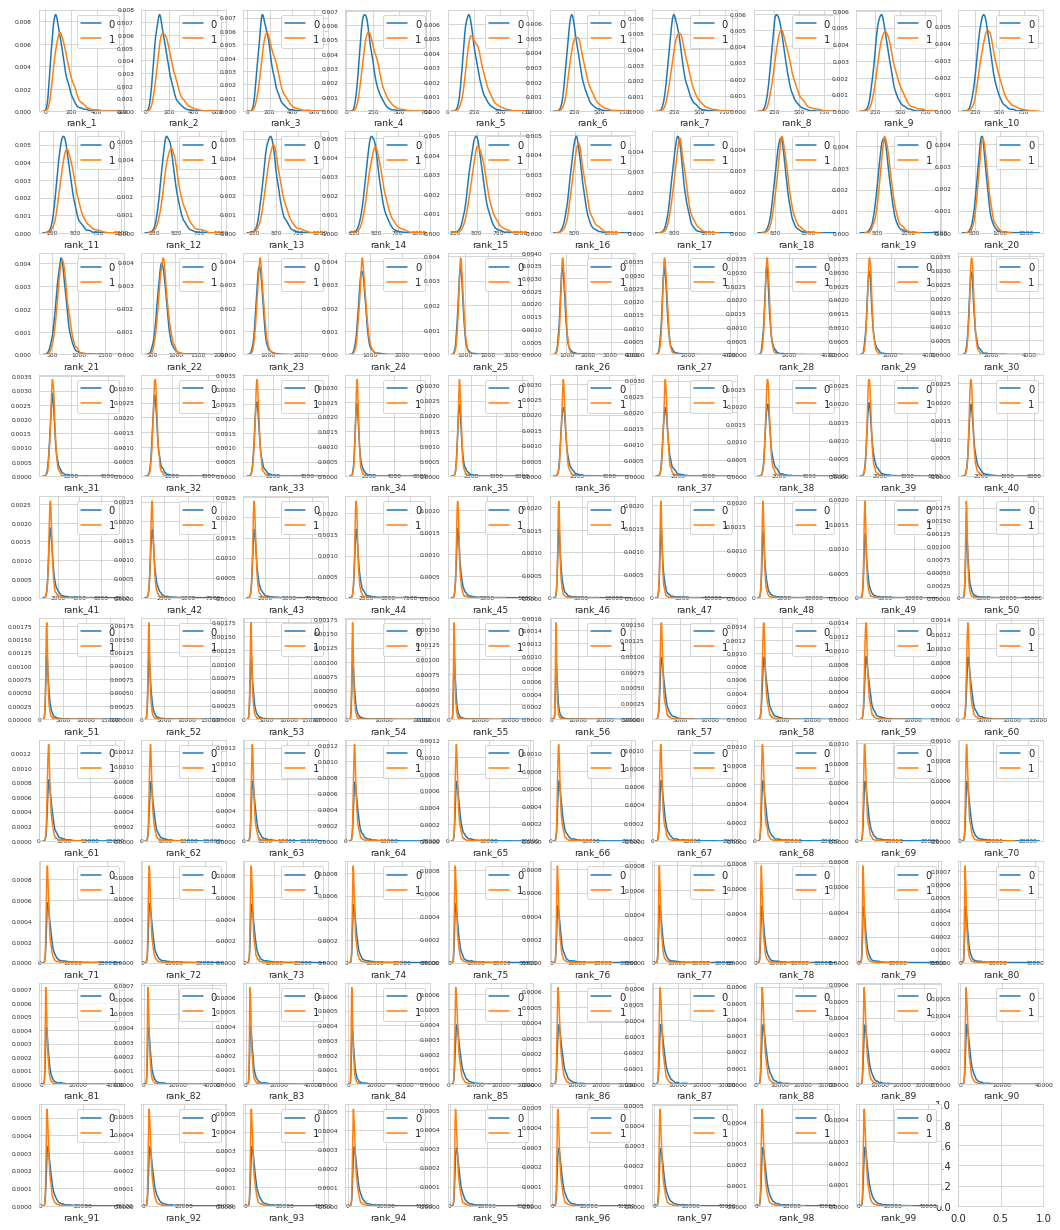

In [76]:
t0 = train.loc[train['manba_flag'] == 0]
t1 = train.loc[train['manba_flag'] == 1]
features = train.columns.values[1:100]
plot_feature_distribution(t0, t1, '0', '1', features)

<Figure size 432x288 with 0 Axes>

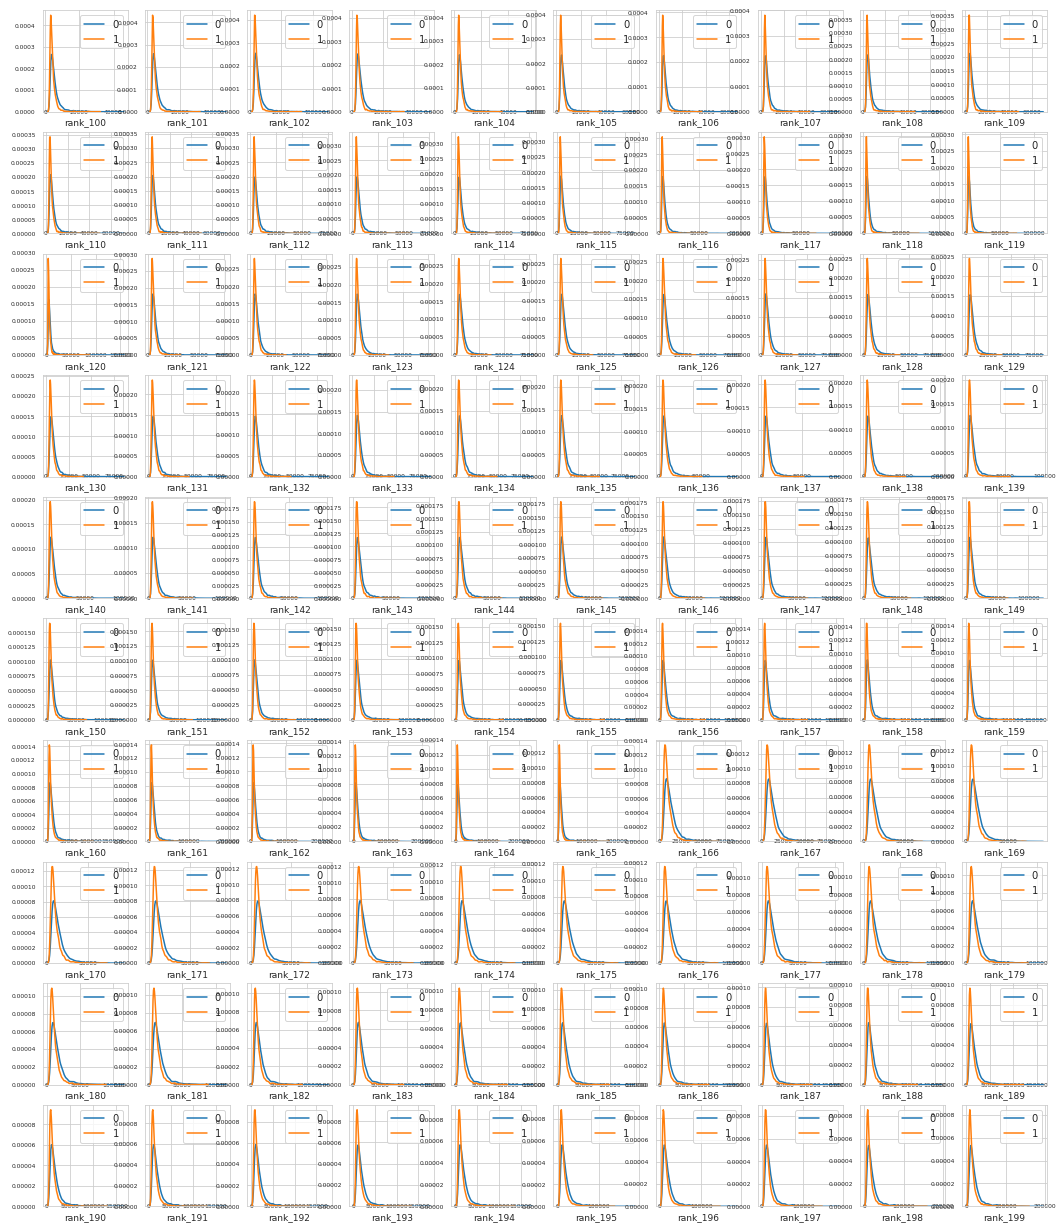

In [77]:
t0 = train.loc[train['manba_flag'] == 0]
t1 = train.loc[train['manba_flag'] == 1]
features = train.columns.values[100:200]
plot_feature_distribution(t0, t1, '0', '1', features)

<Figure size 432x288 with 0 Axes>

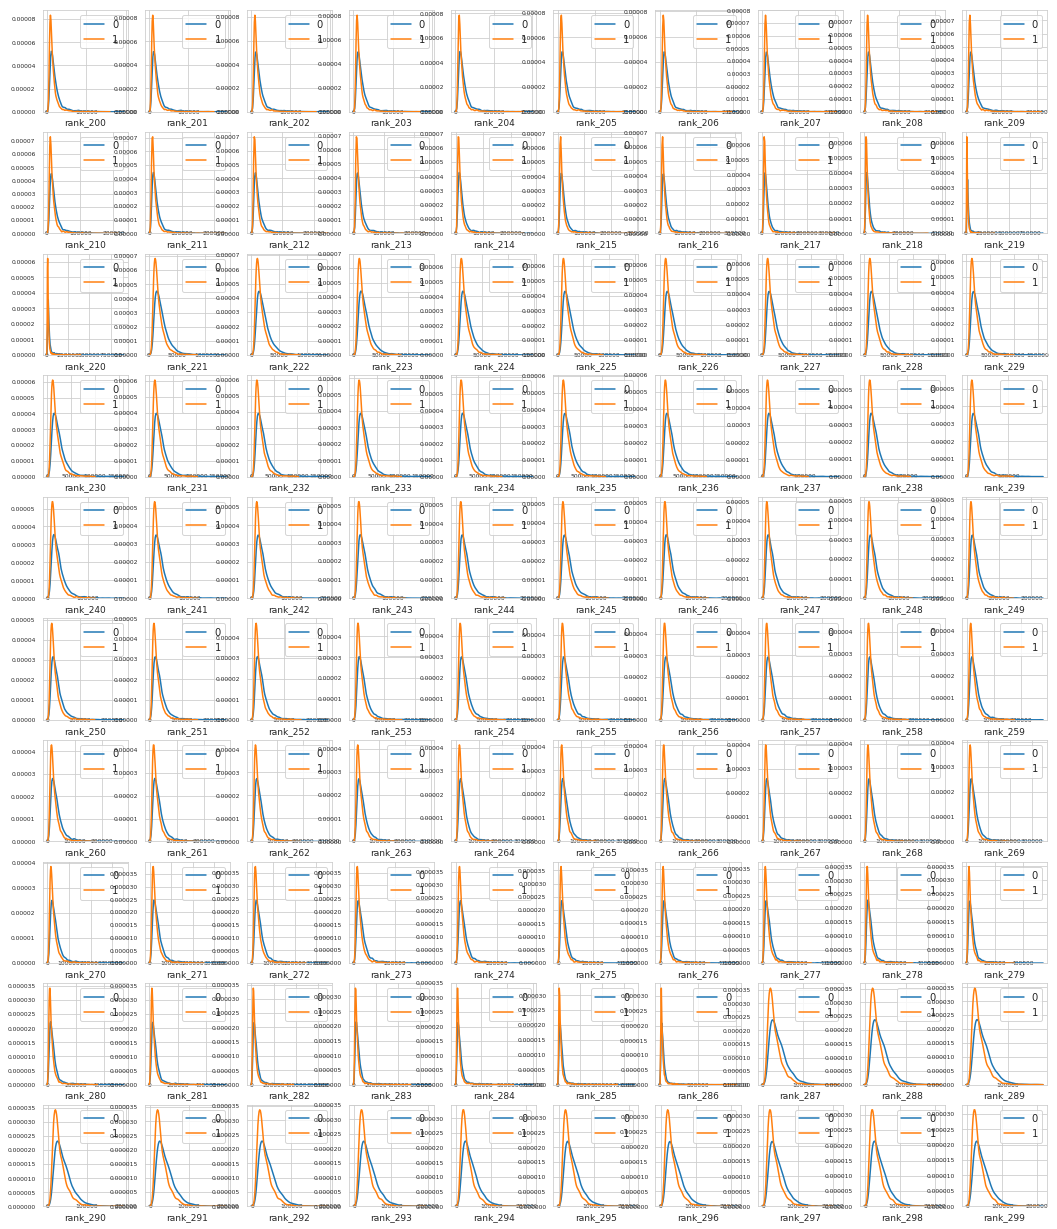

In [78]:
t0 = train.loc[train['manba_flag'] == 0]
t1 = train.loc[train['manba_flag'] == 1]
features = train.columns.values[200:300]
plot_feature_distribution(t0, t1, '0', '1', features)

In [96]:
model = CatBoostClassifier(iterations=5000,
                           task_type="GPU",
                           use_best_model=True,
                           eval_metric = 'AUC' 
                          )

In [97]:
n_split = 5
kf = KFold(n_splits=n_split, random_state=42, shuffle=True)

In [98]:
train = X_train
target = y_train

In [99]:
y_valid_pred = 0 * target
y_test_pred = 0

In [100]:
for idx, (train_index, valid_index) in enumerate(kf.split(train)):
    y_train, y_valid = target.iloc[train_index], target.iloc[valid_index]
    X_train, X_valid = train.iloc[train_index,:], train.iloc[valid_index,:]
    _train = Pool(X_train, label=y_train)
    _valid = Pool(X_valid, label=y_valid)
    print( "\nFold ", idx)
    fit_model = model.fit(_train,
                          eval_set=_valid,
                          use_best_model=True,
                          verbose=5000,
                          plot=True
                         )
    pred = fit_model.predict_proba(X_valid)[:,1]
    print( "  auc = ", roc_auc_score(y_valid, pred) )
    y_valid_pred.iloc[valid_index] = pred
    y_test_pred += fit_model.predict_proba(test)[:,1]
y_test_pred /= n_split


Fold  0


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.044922
0:	learn: 0.7010239	test: 0.6926725	best: 0.6926725 (0)	total: 50.3ms	remaining: 4m 11s
4999:	learn: 0.9994234	test: 0.6968957	best: 0.7156742 (7)	total: 4m 1s	remaining: 0us
bestTest = 0.7156741619
bestIteration = 7
Shrink model to first 8 iterations.
  auc =  0.7156741538014005

Fold  1


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.044922
0:	learn: 0.6955558	test: 0.6890399	best: 0.6890399 (0)	total: 45.8ms	remaining: 3m 48s
4999:	learn: 0.9993883	test: 0.6789454	best: 0.7102020 (288)	total: 3m 59s	remaining: 0us
bestTest = 0.7102019787
bestIteration = 288
Shrink model to first 289 iterations.
  auc =  0.7102019925608359

Fold  2


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.044922
0:	learn: 0.7042129	test: 0.6826742	best: 0.6826742 (0)	total: 46.7ms	remaining: 3m 53s
4999:	learn: 0.9955599	test: 0.6855856	best: 0.7130595 (83)	total: 3m 59s	remaining: 0us
bestTest = 0.7130595446
bestIteration = 83
Shrink model to first 84 iterations.
  auc =  0.7130595278388898

Fold  3


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.044922
0:	learn: 0.7032148	test: 0.6659095	best: 0.6659095 (0)	total: 58.9ms	remaining: 4m 54s
4999:	learn: 0.9989707	test: 0.6751354	best: 0.6845065 (89)	total: 3m 59s	remaining: 0us
bestTest = 0.6845065355
bestIteration = 89
Shrink model to first 90 iterations.
  auc =  0.6845065108548237

Fold  4


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.044922
0:	learn: 0.6995599	test: 0.6771629	best: 0.6771629 (0)	total: 45.8ms	remaining: 3m 49s
4999:	learn: 0.9972955	test: 0.6782612	best: 0.7012555 (310)	total: 3m 57s	remaining: 0us
bestTest = 0.7012555003
bestIteration = 310
Shrink model to first 311 iterations.
  auc =  0.7012555168174766


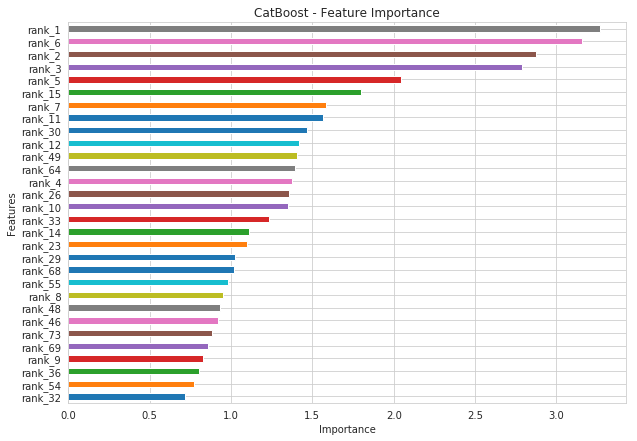

In [110]:
# 棒グラフとしてプロットする
fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
fea_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
plt.title('CatBoost - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance');

In [104]:
feature_importance

array([3.26645755e+00, 2.87347353e+00, 2.78646001e+00, 1.37542537e+00,
       2.04407851e+00, 3.15621327e+00, 1.58447139e+00, 9.51003660e-01,
       8.29333180e-01, 1.35278804e+00, 1.56341587e+00, 1.41958418e+00,
       4.13364253e-01, 1.11134309e+00, 1.79913823e+00, 5.80273070e-01,
       3.66330277e-01, 4.12010362e-01, 3.61925480e-01, 4.52193001e-01,
       6.53355921e-01, 6.22363105e-01, 1.09694937e+00, 2.88362846e-01,
       6.54639334e-01, 1.35404645e+00, 5.66123585e-01, 6.12345883e-01,
       1.02447351e+00, 1.46654949e+00, 1.97792386e-01, 7.16038049e-01,
       1.23392829e+00, 3.69508278e-01, 6.53878470e-01, 8.04763203e-01,
       5.69613649e-01, 4.41397966e-01, 1.99221705e-01, 5.28274650e-01,
       0.00000000e+00, 1.12365816e-01, 6.17329950e-01, 3.76715667e-01,
       6.02363005e-01, 9.17469534e-01, 6.00360928e-02, 9.33363453e-01,
       1.40451156e+00, 6.03435697e-01, 4.29544233e-01, 3.27003110e-01,
       5.68359148e-01, 7.74685645e-01, 9.81097139e-01, 2.06465521e-01,
      